# Computer Vision and Pattern Recognition (CVPR)

**University**: American International University - Bangladesh (AIUB)  
**Course**: Computer Vision and Pattern Recognition  
**Instructor**: Dr. Debajyoti Karmaker  

**Student Name**: Md. Shahidyl Khan Pappo  
**Student ID**: 21-45280-2  
**Section**: B

In [1]:
# Generate Synthetic Data
import pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=30,
    n_informative=15,
    n_redundant=5,
    n_repeated=2,
    n_classes=3,
    n_clusters_per_class=3,
    weights=[0.5, 0.3, 0.2],
    flip_y=0.02,
    class_sep=1.5,
    random_state=123
)

df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y

csv_file = 'synthetic_data.csv'
df.to_csv(csv_file, index=False)

print(f"Dataset saved as {csv_file}")

Dataset saved as synthetic_data.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
file_path = "synthetic_data.csv"
data_frame = pd.read_csv(file_path)

In [4]:
print(data_frame.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.103024   5.444820   3.037353  -2.052087  -4.090553   0.988280   
1  -1.413020   0.250139  -0.422257   0.158060   3.344249   0.491528   
2   1.274604  -3.442581  -1.089437  -0.215403   2.407238  -0.396786   
3   0.824681  -1.055348   6.607651  -2.642431   4.076427  -0.598964   
4   0.107285   0.203080   0.791005   5.031022  -0.819874   1.030288   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   3.650889   0.321680   1.753523    2.604524  ...   -0.681903   -0.664656   
1   3.665279  -0.708174  -0.143010   -0.339780  ...    0.324841    1.441754   
2  -0.738462   0.004014   1.743876    1.335271  ...    0.611452    0.876691   
3 -11.986732  -0.017468  -5.090181   -1.193041  ...    0.406270   -1.752303   
4   2.636732   0.166437   0.191261    9.866433  ...   -1.578644    1.991729   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0   -2.977500   -0.46

In [5]:
features = data_frame.iloc[:, :-1].values
labels = data_frame.iloc[:, -1].values

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
encoder = OneHotEncoder(sparse_output=False)
labels_one_hot = encoder.fit_transform(labels.reshape(-1, 1))

In [8]:
# Split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features_scaled, labels_one_hot, test_size=0.2, random_state=42
)

In [9]:
print(features_train.shape)
print(labels_train.shape)
print(features_test.shape)
print(labels_test.shape)

(800, 30)
(800, 3)
(200, 30)
(200, 3)


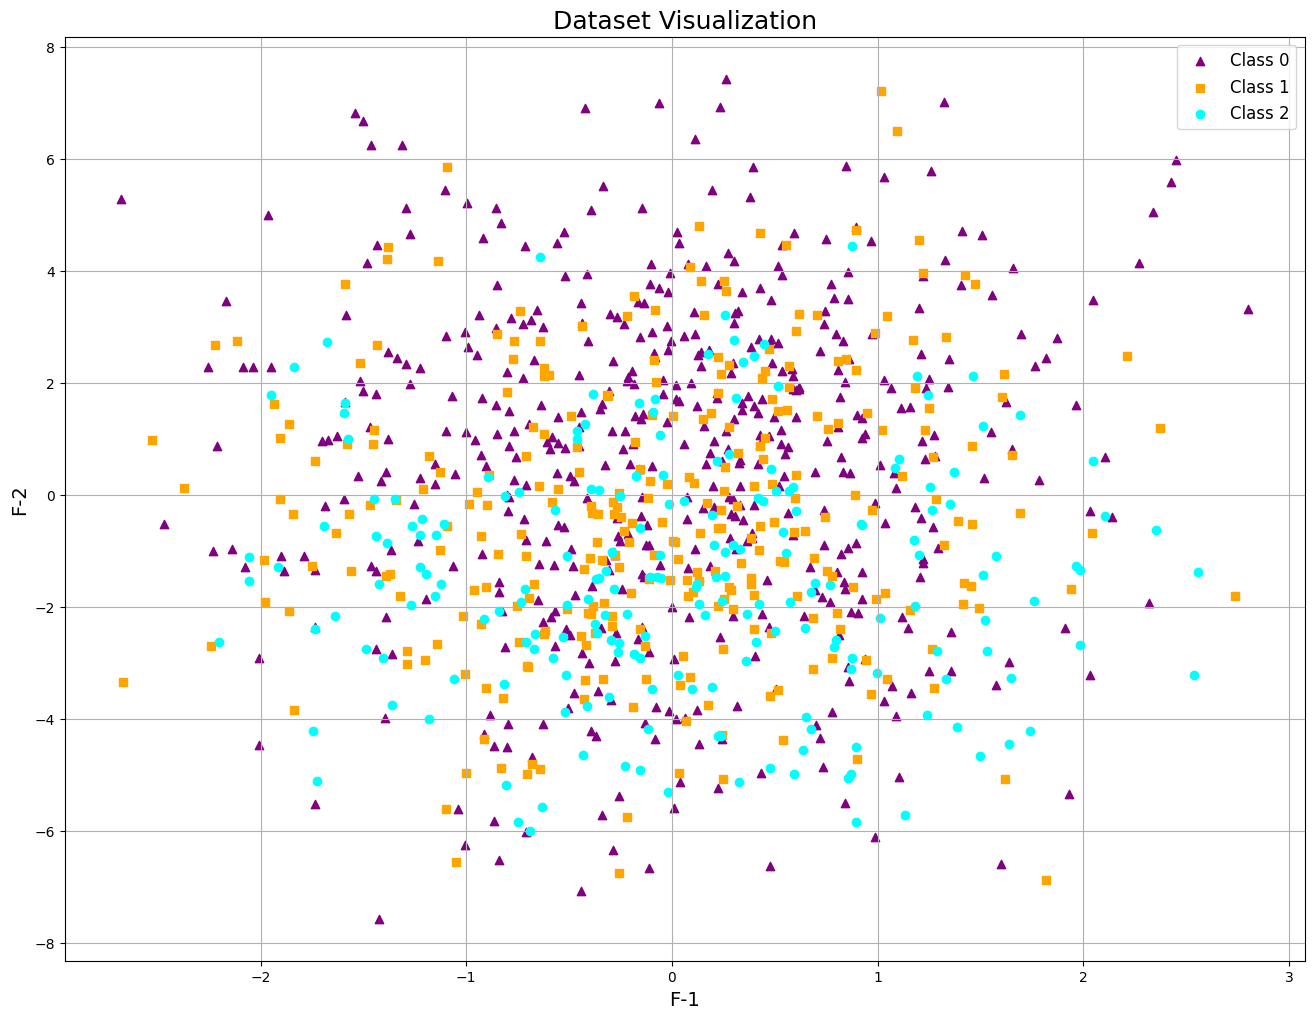

In [10]:
plt.figure(figsize=(16, 12))
markers = ['^', 's', 'o']
colors = ['purple', 'orange', 'cyan']
unique_labels = np.unique(labels)
for class_index, marker, color in zip(unique_labels, markers[:len(unique_labels)], colors[:len(unique_labels)]):
    plt.scatter(
        features[labels == class_index, 0],
        features[labels == class_index, 1],
        marker=marker, color=color, label=f'Class {class_index}'
    )
plt.title("Dataset Visualization", fontsize=18)
plt.xlabel("F-1", fontsize=14)
plt.ylabel("F-2", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [11]:
class ENeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        # Initialize weights and biases with small random values
        self.weights = [
            np.random.randn(input_size, hidden_sizes[0]) * 0.1,
            np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.1,
            np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.1,
            np.random.randn(hidden_sizes[2], output_size) * 0.1
        ]
        self.biases = [np.zeros((1, size)) for size in hidden_sizes + [output_size]]
        self.learning_rate = learning_rate
        self.losses = []
        self.accuracies = []

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def categorical_cross_entropy(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

    def forward(self, X):
        # The error was here, the if condition had a return
        # Removed the return statement
        if X.shape[1] != self.weights[0].shape[0]:
            raise ValueError(f"Input data has {X.shape[1]} features, but the network expects {self.weights[0].shape[0]} features.")

        self.z1 = X @ self.weights[0] + self.biases[0]
        self.a1 = self.relu(self.z1)

        self.z2 = self.a1 @ self.weights[1] + self.biases[1]
        self.a2 = self.relu(self.z2)

        self.z3 = self.a2 @ self.weights[2] + self.biases[2]
        self.a3 = self.relu(self.z3)

        self.z4 = self.a3 @ self.weights[3] + self.biases[3]
        self.output = self.softmax(self.z4)

        return self.output

    def backward(self, X, y_true):
        m = len(X)

        dz4 = self.output - y_true
        dw4 = self.a3.T @ dz4 / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m

        dz3 = (dz4 @ self.weights[3].T) * self.relu_derivative(self.z3)
        dw3 = self.a2.T @ dz3 / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = (dz3 @ self.weights[2].T) * self.relu_derivative(self.z2)
        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = (dz2 @ self.weights[1].T) * self.relu_derivative(self.z1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.weights[3] -= self.learning_rate * dw4
        self.biases[3] -= self.learning_rate * db4

        self.weights[2] -= self.learning_rate * dw3
        self.biases[2] -= self.learning_rate * db3

        self.weights[1] -= self.learning_rate * dw2
        self.biases[1] -= self.learning_rate * db2

        self.weights[0] -= self.learning_rate * dw1
        self.biases[0] -= self.learning_rate * db1

    def train(self, X, y_true, epochs=200, batch_size=32):
        m = X.shape[0]
        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y_true[indices]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                self.forward(X_batch)
                self.backward(X_batch, y_batch)

            if (epoch + 1) % 10 == 0:
                # Calculate loss and accuracy after each epoch
                y_pred = self.forward(X)
                loss = self.categorical_cross_entropy(y_true, y_pred)
                self.losses.append(loss)

                # Calculate accuracy
                predictions = np.argmax(y_pred, axis=1)
                true_labels = np.argmax(y_true, axis=1)
                accuracy = np.mean(predictions == true_labels)
                self.accuracies.append(accuracy)

                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4%}")

    def predict(self, X):
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

In [12]:
features_train = features_train[:, :2]

In [13]:
inputLayerNeurons = 2
hiddenLayerNeurons1 = 200
hiddenLayerNeurons2 = 200
hiddenLayerNeurons3 = 200
outLayerNeurons = 3

In [14]:
nn = ENeuralNetwork(input_size=inputLayerNeurons, hidden_sizes=[hiddenLayerNeurons1, hiddenLayerNeurons2, hiddenLayerNeurons3], output_size=outLayerNeurons, learning_rate=0.01)
print("Training model...")
nn.train(features_train, labels_train, epochs=200)

Training model...
Epoch 10/200, Loss: 0.9851, Accuracy: 48.7500%
Epoch 20/200, Loss: 0.9770, Accuracy: 49.1250%
Epoch 30/200, Loss: 0.9743, Accuracy: 50.2500%
Epoch 40/200, Loss: 0.9728, Accuracy: 50.5000%
Epoch 50/200, Loss: 0.9717, Accuracy: 51.2500%
Epoch 60/200, Loss: 0.9710, Accuracy: 51.3750%
Epoch 70/200, Loss: 0.9703, Accuracy: 52.0000%
Epoch 80/200, Loss: 0.9696, Accuracy: 52.0000%
Epoch 90/200, Loss: 0.9692, Accuracy: 51.6250%
Epoch 100/200, Loss: 0.9687, Accuracy: 52.3750%
Epoch 110/200, Loss: 0.9682, Accuracy: 52.3750%
Epoch 120/200, Loss: 0.9678, Accuracy: 52.3750%
Epoch 130/200, Loss: 0.9674, Accuracy: 51.6250%
Epoch 140/200, Loss: 0.9670, Accuracy: 52.1250%
Epoch 150/200, Loss: 0.9666, Accuracy: 52.6250%
Epoch 160/200, Loss: 0.9662, Accuracy: 52.7500%
Epoch 170/200, Loss: 0.9658, Accuracy: 52.5000%
Epoch 180/200, Loss: 0.9655, Accuracy: 52.7500%
Epoch 190/200, Loss: 0.9651, Accuracy: 52.1250%
Epoch 200/200, Loss: 0.9647, Accuracy: 51.6250%


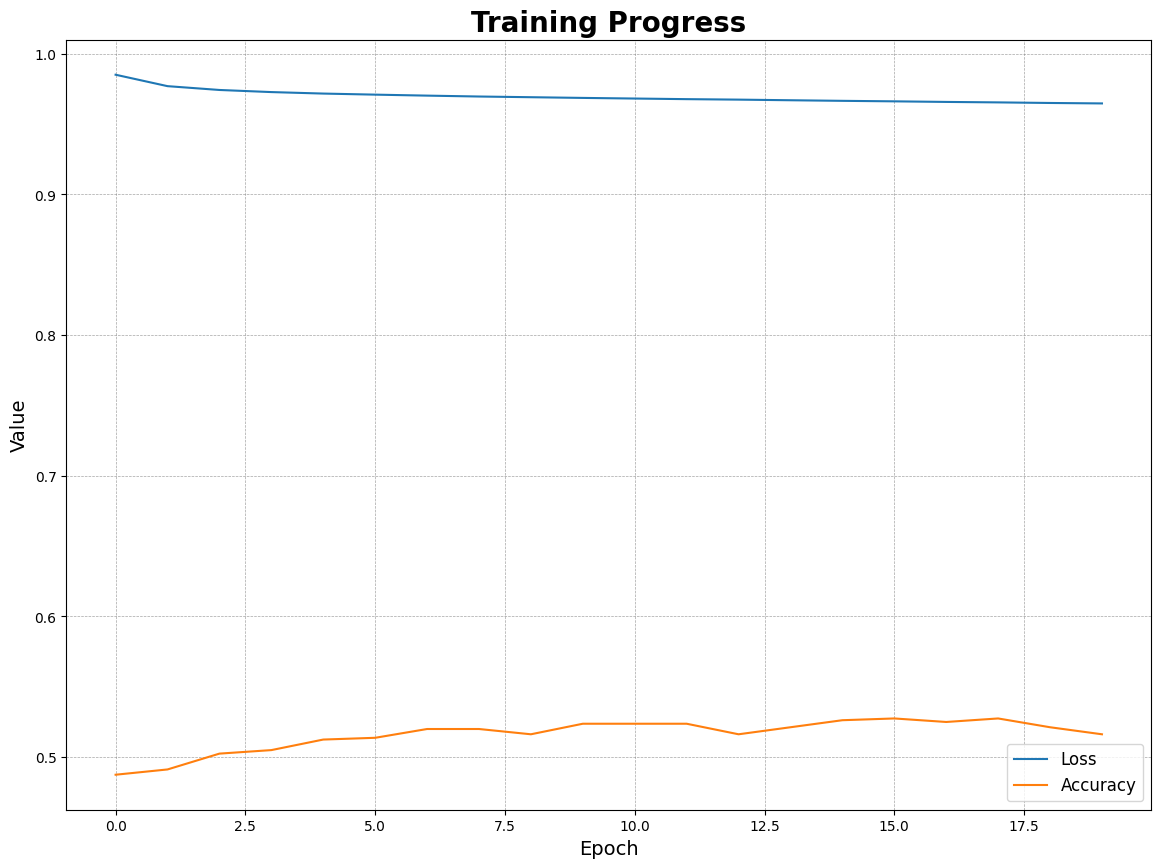

In [15]:
plt.figure(figsize=(14, 10))
plt.plot(nn.losses, label="Loss")
plt.plot(nn.accuracies, label="Accuracy")
plt.title("Training Progress", fontsize=20, weight="bold")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

In [16]:
test_predictions = nn.predict(features_test[:, :2])
true_labels = np.argmax(labels_test, axis=1)

In [17]:
print(test_predictions)
print(true_labels)

[0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 2 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 2 0 1 1 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 1 2 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 2 0 2 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 2 0 0 1
 0 1 0 0 2 1 0 0 1 1 2 1 1 0 0]
[0 0 1 1 0 2 1 1 1 0 0 0 1 1 0 0 0 0 0 1 2 0 2 1 2 2 0 0 0 0 2 0 1 0 1 2 0
 0 0 0 1 2 0 0 2 2 1 1 0 1 0 0 0 1 0 2 1 1 0 2 0 0 1 0 0 0 2 2 0 1 2 0 0 0
 0 0 0 0 0 2 1 0 1 0 0 0 0 1 1 0 0 2 1 0 1 2 0 0 0 0 0 0 0 1 0 0 1 0 2 0 0
 1 2 2 2 0 0 2 1 0 0 0 1 0 2 0 0 0 1 0 0 1 0 1 0 0 0 0 0 2 0 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 0 2 1 1 1 0 1 1 1 2 0 0 0 0 1 0 0 1 0 0 0 2 1 1 0 0 2 2 0 1
 1 2 1 0 1 2 1 0 1 0 1 0 0 0 0]


In [18]:
print("Accuracy:", np.mean(test_predictions == true_labels))

Accuracy: 0.475


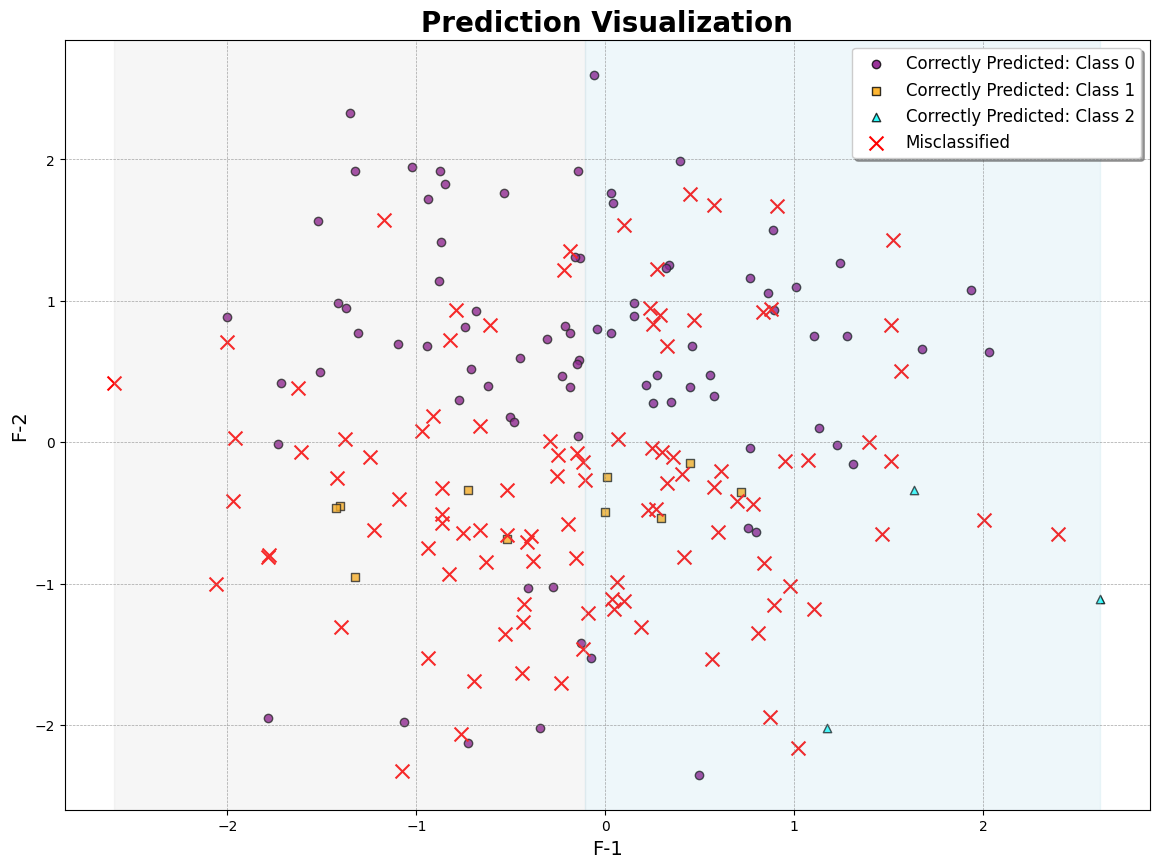

In [19]:
plt.figure(figsize=(14, 10))
colors = ['purple', 'orange', 'cyan']
markers = ['o', 's', '^']
correct_indices = test_predictions == true_labels
incorrect_indices = ~correct_indices

for class_index, color, marker in zip(unique_labels, colors[:len(unique_labels)], markers[:len(unique_labels)]):
    plt.scatter(
        features_test[correct_indices & (true_labels == class_index), 0],
        features_test[correct_indices & (true_labels == class_index), 1],
        color=color,
        marker=marker,
        edgecolor="black",
        alpha=0.8,
        label=f'Correctly Predicted: Class {class_index}'
    )

plt.scatter(
    features_test[incorrect_indices, 0],
    features_test[incorrect_indices, 1],
    color='red',
    marker='x',
    s=100,
    label='Misclassified'
)

plt.title("Prediction Visualization", fontsize=20, weight="bold")
plt.xlabel("F-1", fontsize=14)
plt.ylabel("F-2", fontsize=14)
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.axvspan(xmin=features_test[:, 0].min(), xmax=features_test[:, 0].mean(), color='lightgray', alpha=0.2)
plt.axvspan(xmin=features_test[:, 0].mean(), xmax=features_test[:, 0].max(), color='lightblue', alpha=0.2)
plt.show()